In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

#output_path = '/cluster/home/buchsr/output'
#save_path =  '/cluster/home/buchsr/opinion-formation/media'
output_path = '/Users/romainbuchs/Documents/ETHZ/Modelling and Simulating Social Systems/output'
save_path =  '/Users/romainbuchs/Documents/ETHZ/Modelling and Simulating Social Systems/opinion-formation/media'

In [2]:
tag = 'fig3'
n = np.array([200, 300, 400, 600, 800])
m = 2*n
n_iter = 1000
all_phis = np.arange(0,1.01,0.01)

In [3]:
S = []
for n_i, m_i in zip(n,m):
    list_files = glob.glob('{0}/ComponentsSize_{1}_n{2}_m{3}_gamma10_niter{4}_phi*.npy'.format(output_path, tag, n_i, m_i, n_iter))
    phis = [float(f.split('phi_')[1].split('.npy')[0]) for f in list_files]
    idx = np.argsort(phis)
    phis = np.array(phis)[idx]
    #id_undone = [i+1 for i, phi in enumerate(all_phis) if phi not in phis]
    #print(id_undone)
    list_files = np.array(list_files)[idx]
    print(len(list_files))
    print(list_files[0])
    s = []
    size = np.arange(0, n_i+1, 1)
    for f in list_files:
        s.append([max(size[real!=0]) for real in np.load(f)])
    s = np.stack(s)
    S.append(s)

101
/Users/romainbuchs/Documents/ETHZ/Modelling and Simulating Social Systems/output/ComponentsSize_fig3_n200_m400_gamma10_niter1000_phi_0.0.npy
101
/Users/romainbuchs/Documents/ETHZ/Modelling and Simulating Social Systems/output/ComponentsSize_fig3_n300_m600_gamma10_niter1000_phi_0.0.npy
101
/Users/romainbuchs/Documents/ETHZ/Modelling and Simulating Social Systems/output/ComponentsSize_fig3_n400_m800_gamma10_niter1000_phi_0.0.npy
101
/Users/romainbuchs/Documents/ETHZ/Modelling and Simulating Social Systems/output/ComponentsSize_fig3_n600_m1200_gamma10_niter1000_phi_0.0.npy
101
/Users/romainbuchs/Documents/ETHZ/Modelling and Simulating Social Systems/output/ComponentsSize_fig3_n800_m1600_gamma10_niter1000_phi_0.0.npy


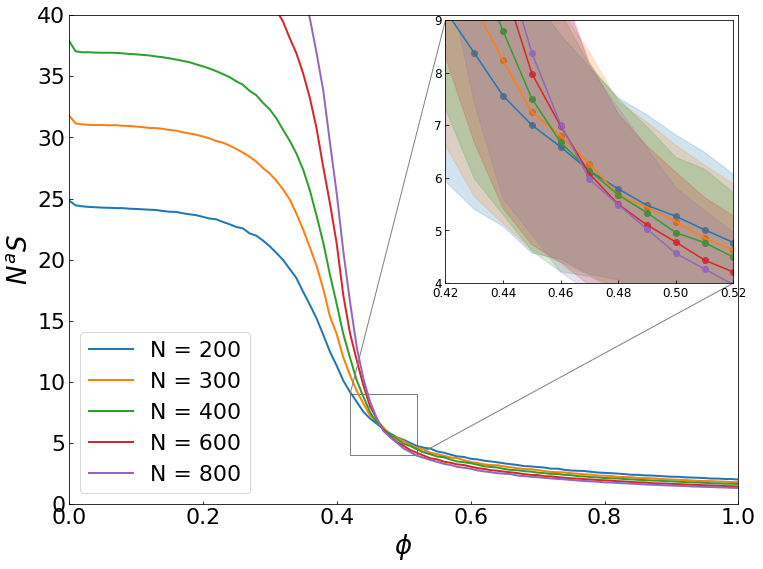

In [4]:
a = 0.61
fig, ax = plt.subplots(figsize=(12, 9))
axins = zoomed_inset_axes(ax, 4.3, loc=1) # zoom-factor: 2.5, location: upper-left

for i, (biggest_coms, n_i) in enumerate(zip(S, n)):
    ax.plot(all_phis, biggest_coms.mean(axis=1)*n[i]**(a-1), color='C{0}'.format(i), linewidth=2, 
            label='N = {0}'.format(n_i))
    axins.fill_between(all_phis, biggest_coms.mean(axis=1)*n[i]**(a-1)-biggest_coms.std(axis=1)*n[i]**(a-1), 
                       biggest_coms.mean(axis=1)*n[i]**(a-1)+biggest_coms.std(axis=1)*n[i]**(a-1), alpha=0.2, color='C{0}'.format(i))
    axins.plot(all_phis, biggest_coms.mean(axis=1)*n[i]**(a-1), color='C{0}'.format(i))
    axins.scatter(all_phis, biggest_coms.mean(axis=1)*n[i]**(a-1), color='C{0}'.format(i))
    #axins.errorbar(all_phis, biggest_coms.mean(axis=1)*n[i]**(a-1), 
                #yerr=biggest_coms.std(axis=1)*n[i]**(a-1), fmt='o', capsize=5, color='C{0}'.format(i),
              #capthick=2)
    

x1, x2, y1, y2 = 0.42, 0.52, 4, 9 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
#axins.xaxis.set_visible(False)
#axins.yaxis.set_visible(False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
axins.tick_params(labelsize=12, direction='in')

ax.set_xlabel('$\phi$', fontsize=26)
ax.set_ylabel('$N^aS$', fontsize=26)
ax.set_xlim((0,1))
ax.legend(fontsize=22, ncol=1, loc=3)
ax.set_ylim((0,40))
ax.tick_params(labelsize=22, direction='in')

#plt.savefig(save_path + '/Fig3_withInsert.png', dpi=300, format='png')
#plt.savefig(save_path + '/Fig3_withInsert.pdf', dpi=300, format='pdf')

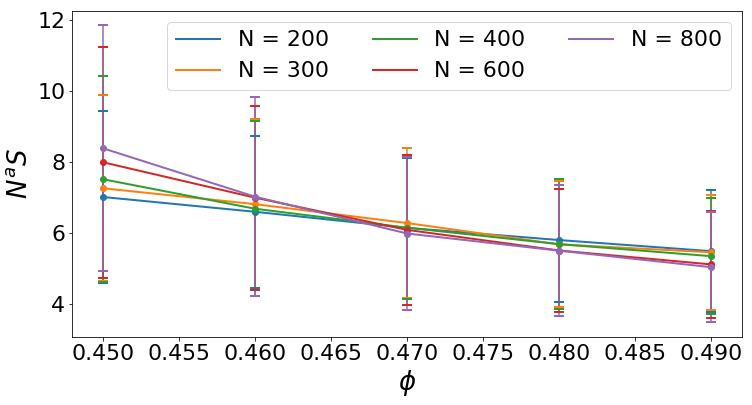

In [5]:
a = 0.61
fig, ax = plt.subplots(figsize=(12, 6))
for i, (biggest_coms, n_i) in enumerate(zip(S, n)):
    ax.plot(all_phis[45:50], biggest_coms.mean(axis=1)[45:50]*n[i]**(a-1), color='C{0}'.format(i), linewidth=2, 
            label='N = {0}'.format(n_i))
    ax.errorbar(all_phis[45:50], biggest_coms.mean(axis=1)[45:50]*n[i]**(a-1), 
                yerr=biggest_coms.std(axis=1)[45:50]*n[i]**(a-1), fmt='o', capsize=5, color='C{0}'.format(i),
               capthick=2)


ax.set_xlabel('$\phi$', fontsize=26)
ax.set_ylabel('$N^aS$', fontsize=26)
ax.legend(fontsize=22, ncol=3)
ax.tick_params(labelsize=22)
#plt.savefig(save_path + '/Fig3_errorbar_crit.png', dpi=300, format='png')
#plt.savefig(save_path + '/Fig3_errorbar_crit.pdf', dpi=300, format='pdf')

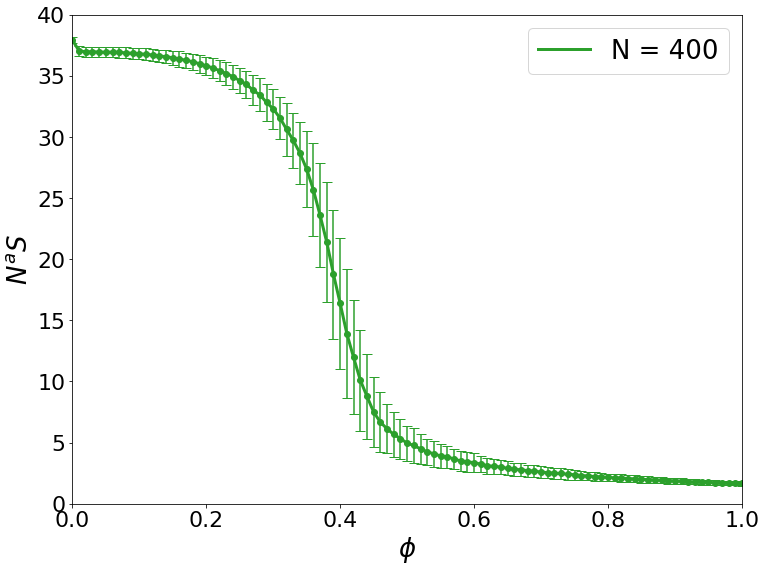

In [6]:
a = 0.61
fig, ax = plt.subplots(figsize=(12, 9))
biggest_coms = S[2]
n_i = n[2]
i=2
ax.plot(all_phis, biggest_coms.mean(axis=1)*n[i]**(a-1), color='C{0}'.format(i), linewidth=3, 
        label='N = {0}'.format(n_i))
ax.errorbar(all_phis, biggest_coms.mean(axis=1)*n[i]**(a-1), yerr=biggest_coms.std(axis=1)*n[i]**(a-1), fmt='o', capsize=5, color='C{0}'.format(i))

#ax.fill_between(all_phis, biggest_coms.mean(axis=1)*n[i]**(a-1)-biggest_coms.std(axis=1)*n[i]**(a-1), biggest_coms.mean(axis=1)*n[i]**(a-1)+biggest_coms.std(axis=1)*n[i]**(a-1), alpha=0.2, color='C{0}'.format(i))
ax.set_xlabel('$\phi$', fontsize=26)
ax.set_ylabel('$N^aS$', fontsize=26)
ax.set_xlim((0,1))
ax.legend(fontsize=26)
ax.set_ylim((0,40))
ax.tick_params(labelsize=22)

#plt.savefig(save_path + '/Fig3_n400_errorbar.png', dpi=300, format='png')
#plt.savefig(save_path + '/Fig3_n400_errorbar.pdf', dpi=300, format='pdf')

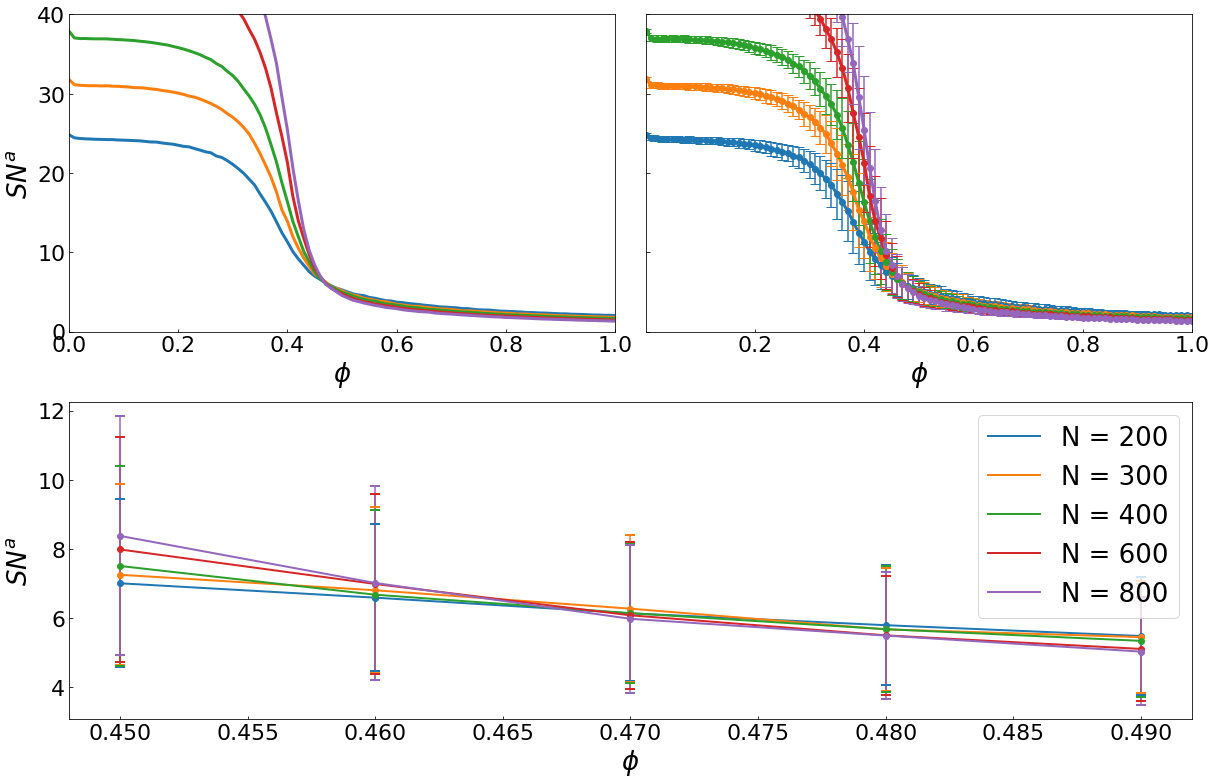

In [11]:
a = 0.61
fig, ax = plt.subplots(figsize=(17, 11))

ax1 = plt.subplot(2, 2, 1)
for i, (biggest_coms, n_i) in enumerate(zip(S, n)):
    ax1.plot(all_phis, biggest_coms.mean(axis=1)*n[i]**(a-1), color='C{0}'.format(i), linewidth=3, 
            label='N = {0}'.format(n_i))

ax1.set_xlabel('$\phi$', fontsize=26)
ax1.set_ylabel('$SN^a$', fontsize=26)
ax1.set_xlim((0,1))
ax1.set_ylim((0,40))
ax1.tick_params(labelsize=22, direction='in')

ax2 = plt.subplot(2, 2, 2)
for i, (biggest_coms, n_i) in enumerate(zip(S, n)):
    ax2.plot(all_phis, biggest_coms.mean(axis=1)*n[i]**(a-1), color='C{0}'.format(i), linewidth=3, 
            label='N = {0}'.format(n_i))
    ax2.errorbar(all_phis, biggest_coms.mean(axis=1)*n[i]**(a-1), yerr=biggest_coms.std(axis=1)*n[i]**(a-1), fmt='o', capsize=5, color='C{0}'.format(i))


ax2.set_xlabel('$\phi$', fontsize=26)
ax2.set_xlim((0,1))
ax2.set_ylim((0,40))
ax2.tick_params(labelsize=22, direction='in')
plt.subplots_adjust(wspace=0)
ax2.set_xticks(np.arange(0.2,1.2,0.2))
ax2.set_yticklabels([])
#ax2.yaxis.set_major_locator(plt.NullLocator())

ax3 = plt.subplot(2, 1, 2)
for i, (biggest_coms, n_i) in enumerate(zip(S, n)):
    ax3.plot(all_phis[45:50], biggest_coms.mean(axis=1)[45:50]*n[i]**(a-1), color='C{0}'.format(i), linewidth=2, 
            label='N = {0}'.format(n_i))
    ax3.errorbar(all_phis[45:50], biggest_coms.mean(axis=1)[45:50]*n[i]**(a-1), 
                yerr=biggest_coms.std(axis=1)[45:50]*n[i]**(a-1), fmt='o', capsize=5, color='C{0}'.format(i),
               capthick=2)


ax3.set_xlabel('$\phi$', fontsize=26)
ax3.set_ylabel('$SN^a$', fontsize=26)
ax3.legend(fontsize=26)
ax3.tick_params(labelsize=22, direction='in')

plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
#plt.savefig(save_path + '/Fig3_4.png', dpi=300, format='png')
#plt.savefig(save_path + '/Fig3_4.pdf', dpi=300, format='pdf')

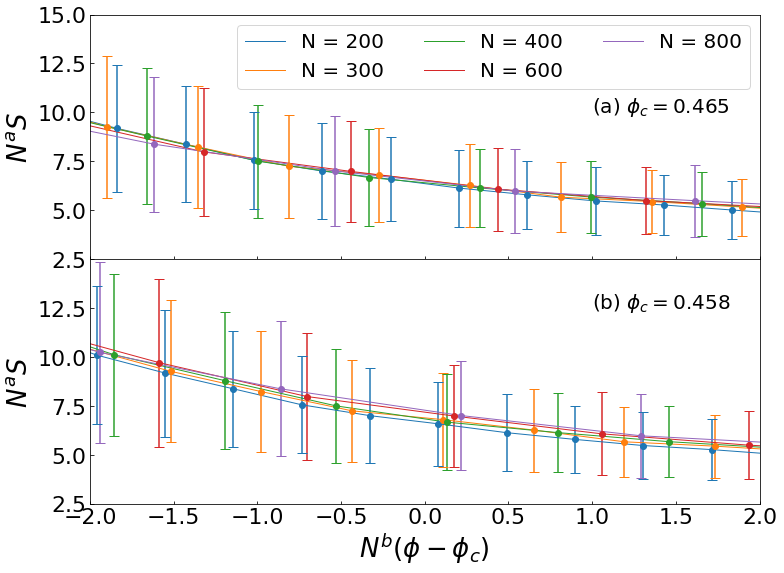

In [8]:
a = 0.61
b = 0.7
phi_c_1 = 0.465
phi_c_2 = 0.458
fig, ax = plt.subplots(figsize=(12, 9), nrows=2, sharex=True)
for i, (biggest_coms, n_i) in enumerate(zip(S, n)):

    ax[0].plot((all_phis-phi_c_1)*n[i]**b, biggest_coms.mean(axis=1)*n[i]**(a-1), color='C{0}'.format(i), linewidth=1, 
            label='N = {0}'.format(n_i))
    ax[0].errorbar((all_phis-phi_c_1)*n[i]**b, biggest_coms.mean(axis=1)*n[i]**(a-1), yerr=biggest_coms.std(axis=1)*n[i]**(a-1), fmt='o', capsize=5, color='C{0}'.format(i))
    
    ax[1].plot((all_phis-phi_c_2)*n[i]**b, biggest_coms.mean(axis=1)*n[i]**(a-1), color='C{0}'.format(i), linewidth=1, 
            label='N = {0}'.format(n_i))
    ax[1].errorbar((all_phis-phi_c_2)*n[i]**b, biggest_coms.mean(axis=1)*n[i]**(a-1), yerr=biggest_coms.std(axis=1)*n[i]**(a-1), fmt='o', capsize=5, color='C{0}'.format(i))


ax[1].set_xlabel('$N^b(\phi-\phi_c)$', fontsize=26)
ax[0].set_xlim((-2,2))

ax[0].set_ylabel('$N^aS$', fontsize=26)
ax[1].set_ylabel('$N^aS$', fontsize=26)

ax[0].set_ylim((2.5,15))
ax[1].set_ylim((2.5,15))

ax[0].legend(fontsize=20, ncol=3)

ax[0].tick_params(labelsize=22, direction='in')
ax[1].tick_params(labelsize=22, direction='in')

ax[0].text(1, 10, '(a) $\phi_c={0}$'.format(phi_c_1), fontsize=20)
ax[1].text(1, 12.5, '(b) $\phi_c={0}$'.format(phi_c_2), fontsize=20)

ax[1].set_yticklabels(np.arange(2.5,15,2.5))

plt.subplots_adjust(hspace=0)

#plt.savefig(save_path + '/Fig3_n400_b.png', dpi=300, format='png')
#plt.savefig(save_path + '/Fig3_n400_b.pdf', dpi=300, format='pdf')